<a href="https://colab.research.google.com/github/Salitre97/ECGR-4105-Intro_to_ML/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Problem 1

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]   # Temperature in Cesius
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]  # measurement
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([5, 9, 6, 2, 7, 3, 4, 0, 1]), tensor([ 8, 10]))

In [4]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [5]:

# Define non-linear model
def nonlinear_model(t_u, w1, w2, b):
    return w2*t_u ** 2 + w1*t_u + b

def linear_model(t_u, w, b):
    return w*t_u + b

# loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Training loop for non-linear model
def nonlinear_train(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = nonlinear_model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = nonlinear_model(val_t_u, *params)
        val_loss = loss_fn(train_t_p, train_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}," f" validation loss {val_loss.item():.4f}")

    return params
    print('\n')
# Training loop for linear model
def linear_train(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = linear_model(train_t_u, * params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = linear_model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}," f" Validation loss {val_loss.item():.4f}")
    return params



In [6]:
# Different learning rates and optimizers
learning_rates = [0.1, 0.01, 0.001, 0.0001]
print('Stochastic Gradient Descent (SGD):\n')
for lr in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0],  requires_grad=True)
  optimizer = optim.SGD([params], lr=lr)
  print(f'Learning rate: {lr}\n')
  nonlinear_train(n_epochs=5000, optimizer=optimizer, params=params, train_t_u=train_t_un, val_t_u=val_t_un, train_t_c=train_t_c, val_t_c=val_t_c)

print('Adam Optimizer:\n')
for lr in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.Adam([params], lr=lr)
  print(f'Learning rate: {lr}\n')
  nonlinear_train(n_epochs=5000, optimizer=optimizer, params=params, train_t_u=train_t_un, val_t_u=val_t_un, train_t_c=train_t_c, val_t_c=val_t_c)


Stochastic Gradient Descent (SGD):

Learning rate: 0.1

Epoch 500, Training loss nan, validation loss nan
Epoch 1000, Training loss nan, validation loss nan
Epoch 1500, Training loss nan, validation loss nan
Epoch 2000, Training loss nan, validation loss nan
Epoch 2500, Training loss nan, validation loss nan
Epoch 3000, Training loss nan, validation loss nan
Epoch 3500, Training loss nan, validation loss nan
Epoch 4000, Training loss nan, validation loss nan
Epoch 4500, Training loss nan, validation loss nan
Epoch 5000, Training loss nan, validation loss nan
Learning rate: 0.01

Epoch 500, Training loss nan, validation loss nan
Epoch 1000, Training loss nan, validation loss nan
Epoch 1500, Training loss nan, validation loss nan
Epoch 2000, Training loss nan, validation loss nan
Epoch 2500, Training loss nan, validation loss nan
Epoch 3000, Training loss nan, validation loss nan
Epoch 3500, Training loss nan, validation loss nan
Epoch 4000, Training loss nan, validation loss nan
Epoch 4

Epoch 500, Training loss 2.7485, validation loss 2.7485
Epoch 1000, Training loss 2.2841, validation loss 2.2841
Epoch 1500, Training loss 1.9792, validation loss 1.9792
Epoch 2000, Training loss 1.8492, validation loss 1.8492
Epoch 2500, Training loss 1.8138, validation loss 1.8138
Epoch 3000, Training loss 1.8080, validation loss 1.8080
Epoch 3500, Training loss 1.8076, validation loss 1.8076
Epoch 4000, Training loss 1.8075, validation loss 1.8075
Epoch 4500, Training loss 1.8075, validation loss 1.8075
Epoch 5000, Training loss 1.8075, validation loss 1.8075
Epoch 1, Training loss 75.7952, Validation loss 100.9256
Epoch 2, Training loss 75.7952, Validation loss 100.9256
Epoch 3, Training loss 75.7952, Validation loss 100.9256
Epoch 500, Training loss 75.7952, Validation loss 100.9256
Epoch 1000, Training loss 75.7952, Validation loss 100.9256
Epoch 1500, Training loss 75.7952, Validation loss 100.9256
Epoch 2000, Training loss 75.7952, Validation loss 100.9256
Epoch 2500, Training 

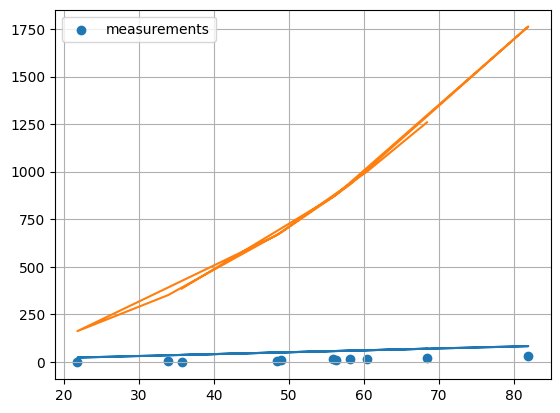

In [7]:
# Best nonlinear model vs linear model (in class from textbook)
nonlinear_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
nonlinear_optimizer = optim.Adam([nonlinear_params], lr=0.1)
linear_params = torch.tensor([1.0, 0.0], requires_grad=True)
linear_optimizer = optim.Adam([nonlinear_params], lr=0.01)

nonlinear = nonlinear_train(n_epochs=5000, optimizer=nonlinear_optimizer, params=nonlinear_params, train_t_u=train_t_un, val_t_u=val_t_un, train_t_c=train_t_c, val_t_c=val_t_c)
linear = linear_train(n_epochs=5000, optimizer=linear_optimizer, params=linear_params, train_t_u=train_t_un, val_t_u=val_t_un, train_t_c=train_t_c, val_t_c=val_t_c )

t_p_linear = linear_model(t_u, *linear).detach().numpy()
t_p_nonlinear = nonlinear_model(t_u, *nonlinear).detach().numpy()

plt.scatter(t_u, t_c, label='measurements')
plt.plot(t_u, t_p_linear)
plt.plot(t_u, t_p_nonlinear)
plt.legend()
plt.grid()
plt.show()


#Problem 2

In [8]:
file_path = '/content/drive/MyDrive/ML-4105/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [9]:
# model for 6 parameters
def linear_model1(t_x, w5, w4, w3, w2, w1, b):
    return torch.matmul(t_x, params[:-1].double()) + params[-1].double()

# model for 11 parameters
def linear_model2(t_x, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
    return torch.matmul(t_x, params[:-1].double()) + params[-1].double()

def linear_train1(epochs, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y):
  train_losses = []
  val_losses = []

  for epoch in range(1, epochs+1):
    train_t_p = linear_model1(train_t_x, *params)
    train_loss = loss_fn(train_t_p, train_t_y)

    val_t_p = linear_model1(val_t_x, *params)
    val_loss = loss_fn(val_t_p, val_t_y)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {val_loss:.6f}\n')

  return params, train_losses, val_losses

# training loop for 11 parameters
def linear_train2(epochs, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y):
  train_losses = []
  val_losses = []

  for epoch in range(1, epochs+1):
    train_t_p = linear_model2(train_t_x, *params)
    train_loss = loss_fn(train_t_p, train_t_y)

    val_t_p = linear_model2(val_t_x1, *params)
    val_loss = loss_fn(val_t_p, val_t_y)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {val_loss:.6f}\n')

  return params, train_losses, val_losses

In [10]:
features = ["area", "bedrooms", "bathrooms", "stories", "parking"]

x = housing[features].values
y = housing['price'].values

sc = StandardScaler()
x_sc = sc.fit_transform(x)

t_x = torch.tensor(x_sc)
t_y = torch.tensor(y)

n_samples = t_x.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_x = t_x[train_indices]
train_t_y = t_y[train_indices]

val_t_x = t_x[val_indices]
val_t_y = t_y[val_indices]

train_indices, val_indices
train_t_x.shape



torch.Size([436, 5])

In [11]:
# Adam with different learning rates
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.1)
print(f'Learning rate: 0.1\n')
trained_params, train_losses, val_losses = linear_train1(
    5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.01)
print(f'Learning rate: 0.01\n')
trained_params1, train_losses1, val_losses1 = linear_train1(
    5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.001)
print(f'Learning rate: 0.001\n')
trained_params2, train_losses2, val_losses2 = linear_train1(
    5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.0001)
print(f'Learning rate: 0.0001\n')
trained_params3, train_losses3, val_losses3 = linear_train1(
    5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y
)

# SGD with different learning rates
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.1\n')
trained_params4, train_losses4, val_losses4 = linear_train1(
    5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y
)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.01\n')
trained_params5, train_losses5, val_losses5 = linear_train1(
    5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y
)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.001\n')
trained_params6, train_losses6, val_losses6 = linear_train1(
    5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y
)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.0001\n')
trained_params7, train_losses7, val_losses7 = linear_train1(
    5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y
)

Learning rate: 0.1

Epochs: 500, 	Training Loss: 25711551468828.457031, 	Validation Loss: 28218462871494.449219

Epochs: 1000, 	Training Loss: 25710692762460.929688, 	Validation Loss: 28217435852154.218750

Epochs: 1500, 	Training Loss: 25709834101132.421875, 	Validation Loss: 28216408878465.289062

Epochs: 2000, 	Training Loss: 25708975483452.289062, 	Validation Loss: 28215381950489.000000

Epochs: 2500, 	Training Loss: 25708116944719.000000, 	Validation Loss: 28214355120687.457031

Epochs: 3000, 	Training Loss: 25707258475340.910156, 	Validation Loss: 28213328357319.339844

Epochs: 3500, 	Training Loss: 25706400058459.640625, 	Validation Loss: 28212301645909.375000

Epochs: 4000, 	Training Loss: 25705541694198.429688, 	Validation Loss: 28211274986587.558594

Epochs: 4500, 	Training Loss: 25704683382557.261719, 	Validation Loss: 28210248379353.875000

Epochs: 5000, 	Training Loss: 25703825123536.140625, 	Validation Loss: 28209221824208.339844

Learning rate: 0.01

Epochs: 500, 	Traini

In [12]:
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

# Applying the function to the list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [13]:
feature_list = ['area', 'bedrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x1 = housing[feature_list].values
y1 = housing['price'].values.reshape(-1,1)

sc = StandardScaler()
x1_sc = sc.fit_transform(x1)

t_x1 = torch.tensor(x1_sc)
t_y1 = torch.tensor(y1)

n_samples = t_x1.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_x1 = t_x1[train_indices]
train_t_y1 = t_y1[train_indices]

val_t_x1 = t_x1[val_indices]
val_t_y1 = t_y1[val_indices]

train_t_x1.shape

torch.Size([436, 10])

In [ ]:
# Adam with different learning rates
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.1)
print(f'Learning rate: 0.1\n')
trained_params8, train_losses8, val_losses8 = linear_train2(
    5000, optimizer, params, train_t_x1, val_t_x1, train_t_y1, val_t_y1
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.01)
print(f'Learning rate: 0.01\n')
trained_params9, train_losses9, val_losses9 = linear_train2(
    5000, optimizer, params, train_t_x1, val_t_x1, train_t_y1, val_t_y1
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.001)
print(f'Learning rate: 0.001\n')
trained_params10, train_losses10, val_losses10 = linear_train2(
    5000, optimizer, params, train_t_x1, val_t_x1, train_t_y1, val_t_y1
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.0001)
print(f'Learning rate: 0.0001\n')
trained_params11, train_losses11, val_losses11 = linear_train2(
    5000, optimizer, params, train_t_x1, val_t_x1, train_t_y1, val_t_y1
)

# SGD with different learning rates
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.1\n')
trained_params12, train_losses12, val_losses12 = linear_train2(
    5000, optimizer, params, train_t_x1, val_t_x1, train_t_y1, val_t_y1
)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.01\n')
trained_params13, train_losses13, val_losses13 = linear_train2(
    5000, optimizer, params, train_t_x1, val_t_x1, train_t_y1, val_t_y1
)
params = torch.tensor([11.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.001\n')
trained_params14, train_losses14, val_losses14 = linear_train2(
    5000, optimizer, params, train_t_x1, val_t_x1, train_t_y1, val_t_y1
)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.0001\n')
trained_params15, train_losses15, val_losses15 = linear_train2(
    5000, optimizer, params, train_t_x1, val_t_x1, train_t_y1, val_t_y1
)

Learning rate: 0.1

Epochs: 500, 	Training Loss: 26267371007489.988281, 	Validation Loss: 25997300535536.937500

Epochs: 1000, 	Training Loss: 26266844027589.597656, 	Validation Loss: 25997024825739.171875

Epochs: 1500, 	Training Loss: 26266317116704.210938, 	Validation Loss: 25996749116162.769531

Epochs: 2000, 	Training Loss: 26265790276415.710938, 	Validation Loss: 25996473422865.054688

Epochs: 2500, 	Training Loss: 26265263484149.656250, 	Validation Loss: 25996197733838.656250

Epochs: 3000, 	Training Loss: 26264736674907.242188, 	Validation Loss: 25995921989719.863281

Epochs: 3500, 	Training Loss: 26264209900610.441406, 	Validation Loss: 25995646257689.742188

Epochs: 4000, 	Training Loss: 26263683168601.054688, 	Validation Loss: 25995370552774.136719

Epochs: 4500, 	Training Loss: 26263156480041.589844, 	Validation Loss: 25995094870221.945312

Epochs: 5000, 	Training Loss: 26262629832650.929688, 	Validation Loss: 25994819219223.695312

Learning rate: 0.01

Epochs: 500, 	Traini